In [1]:
import pandas as pd
import seaborn as sbn

# Task 1

### Part 1

#### I created a file parser which goes through our csv files and returns a pandas dataframe
##### Code explanation given using the "#" symbols

In [2]:
def evlas_parser(file_name):
    #The first parser calculates the dimensions of the csv file
    parser = open(file_name, "r", encoding = 'utf-8-sig')#added 'utf-8-sig' to read weird string formats in the file
    count = 0
    tempo = parser.readline()
    #By splitting based on comma, we can count the number of variables
    perma = tempo.split(",")
    col_count = len(perma)
    #Counts the number of rows, by going through the whole file
    for line in parser:
        count += 1
    parser.close()
    
    #Initiating the main file that will consist all our data
    main = list()
    #This time opening the parser for actual parsing
    evlas_file = open(file_name, "r", encoding = 'utf-8-sig')
    #Gets the headers and then splits them, to get a list of them
    headers = evlas_file.readline()
    temp = ''.join((filter(lambda x: x not in ['\n','"'], headers)))#minor data cleansing
    title = temp.split(",")
    #Goes through all the rows
    for i in range(count):
        #This readline() starts from the second line of our csv file
        case = evlas_file.readline()
        research = ''.join((filter(lambda x: x not in ['\n'], case)))#minor data cleansing
        #Again, split() seperates the individual components in that row
        label = research.split(",")
        #Creates a dictionary object to represent each individual data point
        values = dict()
        #connects the data point with corresponding title
        for j in range(col_count):
            values.update({title[j]:label[j]})
        main.append(values)
    evlas_file.close()
    #converting to pandas dataframe and displaying indices starting from 1
    finale = pd.DataFrame(data = main)
    finale.index += 1
    return finale

###### Convert  and store all our CSV files to pandas dataframe

In [3]:
#parsing all our csv files
baro_data = evlas_parser('barometer-last-year.csv')
ind_tp_data = evlas_parser('indoor-temperature-last-year.csv')
out_tp_data = evlas_parser('outside-temperature-last-year.csv')
rain_data = evlas_parser('rainfall-last-year.csv')
#ind_tp_data

### Part 2

#### I created a function for calculating the Mean, Minimum, Maximum and Standard deviation of any pandas dataframe that is passed into it. It made it easier to calculate the above 4 statistics for our datasets. 

In [4]:
#A function to calculate mean, minimum, maximum and standard deviation of our csv files
def stat_calculator(pd_df):
    para_1 = pd_df.columns.values.tolist()
    para_1 = para_1[1:len(para_1)]
    finale = list()
    mean = dict()
    mini = dict()
    maxi = dict()
    stde = dict()
    for names in para_1:    
        pd_df[names] = pd.to_numeric(pd_df[names], downcast = "float")
        mn = pd_df[names].mean()
        mean.update({names:mn})
        mi = pd_df[names].min()
        mini.update({names:mi})
        mx = pd_df[names].max()
        maxi.update({names:mx})
        sd = pd_df[names].std()
        stde.update({names:sd})
    finale.append(mean)
    finale.append(mini)
    finale.append(maxi)
    finale.append(stde)

    felina = pd.DataFrame(finale, index = ['Mean', 'Minimum', 'Maximum', 'Standard Deviation'])
    return felina

#### Here, I used the above function to calculate all the required values for all our datasets

In [5]:
#Calculating the stats for all our csv files
baro_stat = stat_calculator(baro_data)
print("the key summary statistcs of barometer readings from last year are: \n")
print(baro_stat)
print()
ind_tp_stat = stat_calculator(ind_tp_data)
print("the key summary statistcs of indoor temperatures from last year are: \n")
print(ind_tp_stat)
print()
out_tp_stat = stat_calculator(out_tp_data)
print("the key summary statistcs of outdoor temperatures from last year are: \n")
print(out_tp_stat)
print()
rain_stat = stat_calculator(rain_data)
print("the key summary statistcs of rainfall last year are: \n")
print(rain_stat)
print()

the key summary statistcs of barometer readings from last year are: 

                           Baro
Mean                1009.998962
Minimum              979.599976
Maximum             1035.599976
Standard Deviation     9.869662

the key summary statistcs of indoor temperatures from last year are: 

                     Humidity  Temperature  Temperature_range (low)  \
Mean                48.519775    21.827883                20.555931   
Minimum             37.000000    18.040001                14.900000   
Maximum             59.000000    29.209999                28.200001   
Standard Deviation   5.188883     2.058307                 2.405125   

                    Temperature_range (high)  
Mean                               23.533617  
Minimum                            19.700001  
Maximum                            31.100000  
Standard Deviation                  1.701466  

the key summary statistcs of outdoor temperatures from last year are: 

                    Temperature  T

### Part 3

#### I merged all our pandas dataframes to one mega-dataframe, with the Time-stamp as the anchor and then plot all the variables against each other using the seaborn library. 

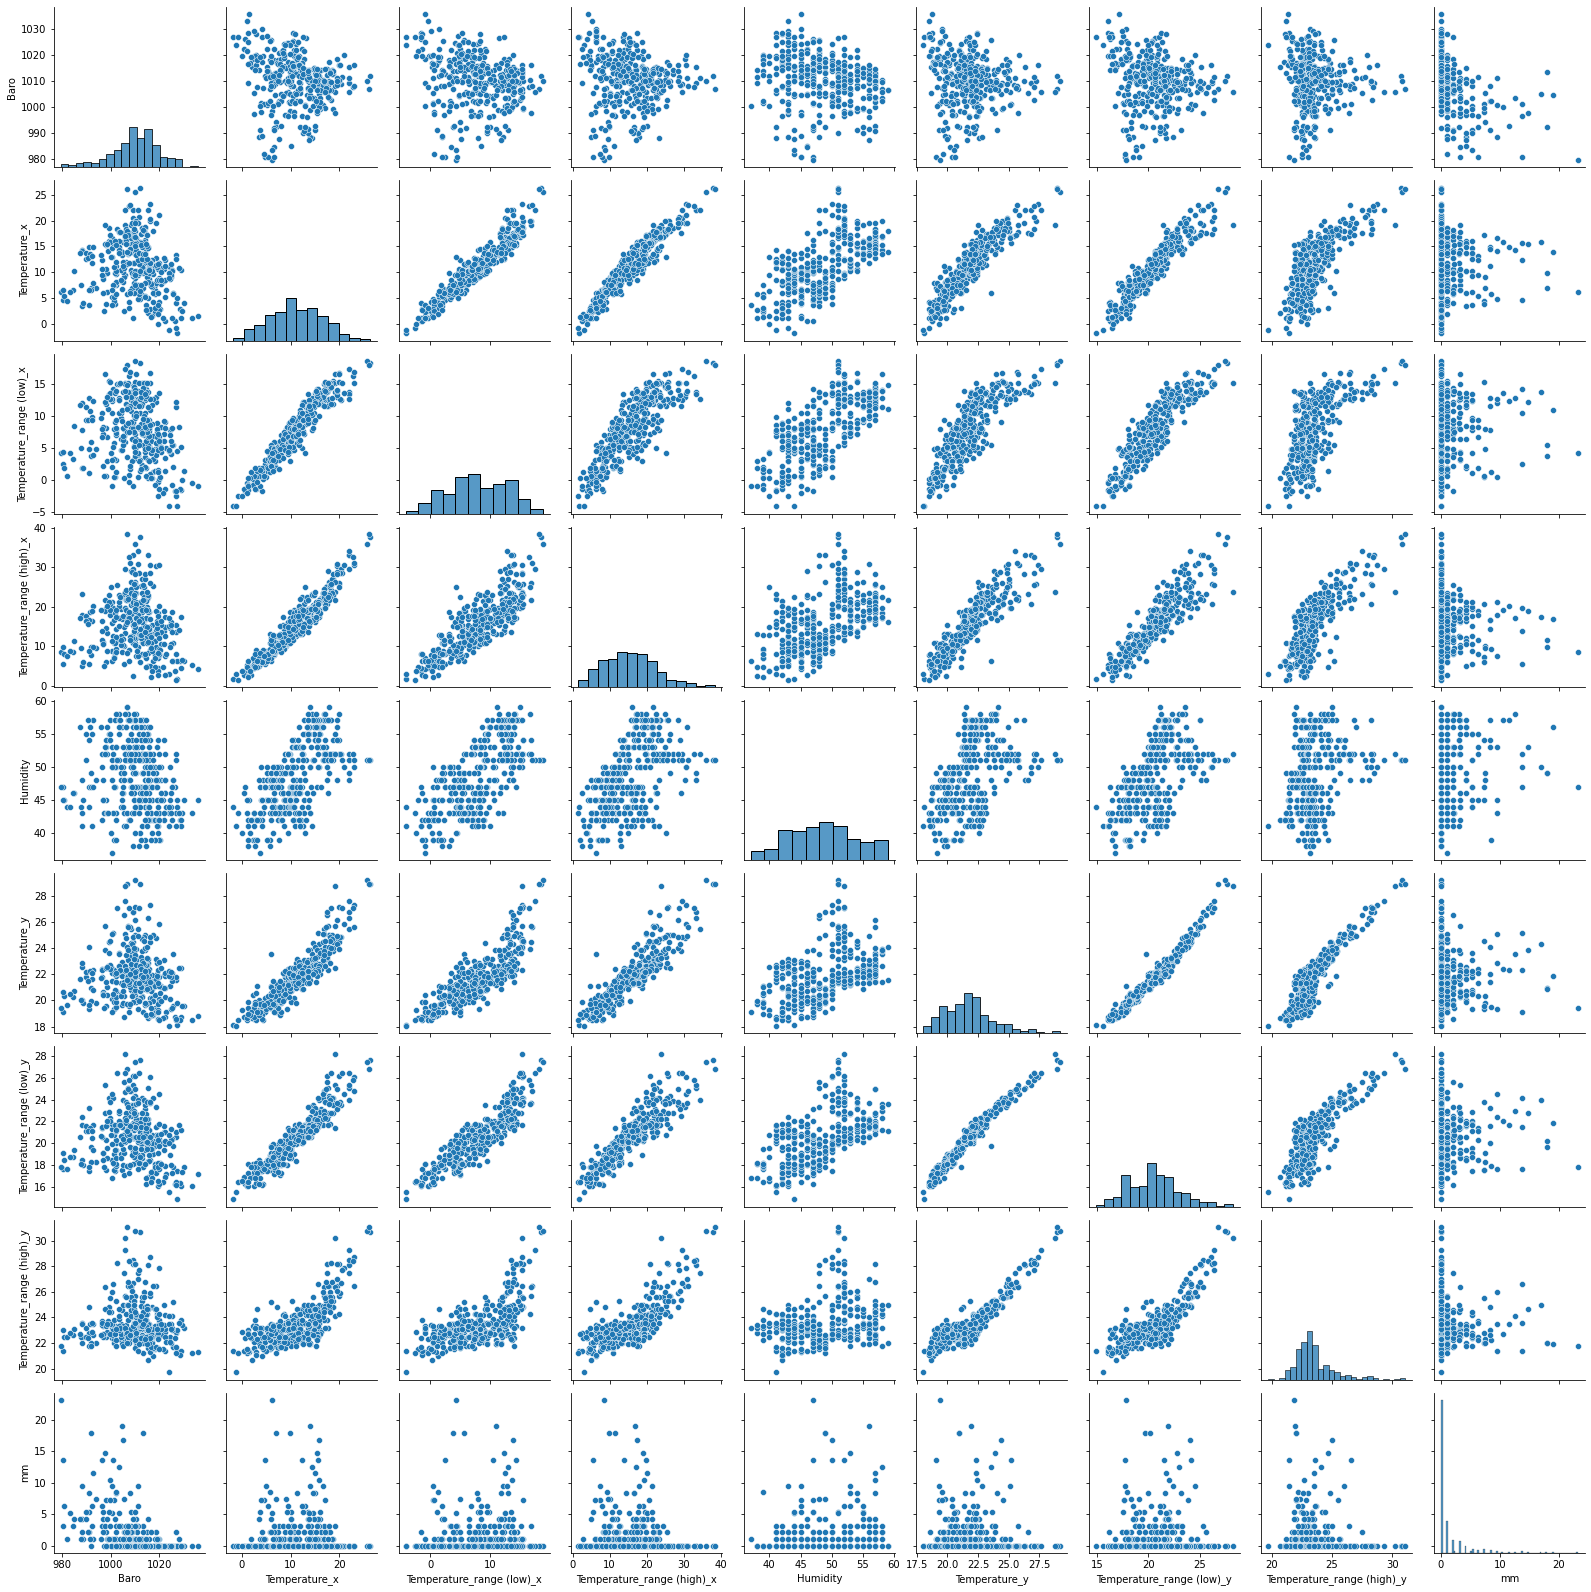

In [36]:
#We will merge the pandas dataframes we have so far and then plot'em
merger_1 = baro_data.merge(out_tp_data, on = 'DateTime')
merger_2 = merger_1.merge(ind_tp_data, on = 'DateTime')
merger_3 = merger_2.merge(rain_data, on = 'DateTime')
sbn.pairplot(merger_3)

# Task 2

### Part 1

#### Adding the Months and Seasons to our Pandas Dataframe. 

In [7]:
Months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
Month_list = []
Szn_list = []
for i in range(len(merger_3)):
    for j in range(12):
        strng = merger_3.iloc[i,0]
        if int(strng[6:8]) == j + 1: 
            Month_list.append(Months[j])
            if Months[j] == 'December' or Months[j] == 'January' or Months[j] == 'February':
                Szn_list.append('Winter')
            if Months[j] == 'March' or Months[j] == 'April' or Months[j] == 'May':
                Szn_list.append('Spring')
            if Months[j] == 'June' or Months[j] == 'July' or Months[j] == 'August':
                Szn_list.append('Summer')
            if Months[j] == 'September' or Months[j] == 'October' or Months[j] == 'November':
                Szn_list.append('Autumn')
                
merger_3['Month'] = Month_list         
merger_3['Season'] = Szn_list

### Part 2

#### It seemed some of the factors in our data were correlated, so I used the Pearson Correlation factor to calculate the correlation between all our different factors. 

In [8]:
rain = merger_3['mm']
pressure = merger_3['Baro']
humidity = merger_3['Humidity']
in_temp = merger_3['Temperature_y']
out_temp = merger_3['Temperature_x']
monthly = merger_3['Month']
corr_1 = rain.corr(humidity, method = 'pearson')
corr_2 = rain.corr(pressure, method = 'pearson')
corr_3 = pressure.corr(humidity, method = 'pearson')
corr_4 = out_temp.corr(pressure, method = 'pearson')
corr_5 = out_temp.corr(humidity, method = 'pearson')
corr_6 = in_temp.corr(humidity, method = 'pearson')
corr_7 = out_temp.corr(in_temp, method = 'pearson')
print(corr_1)
print(corr_2)
print(corr_3)
print(corr_4)
print(corr_5)
print(corr_6)
print(corr_7)

0.1708413625394411
-0.4806542701820371
-0.20028872583791263
-0.1533237956131435
0.6452498978476737
0.48133399983654523
0.9020891637248307


#### It seems there are two important correlations that can be observed here. 

#### - First is the rather strong correlation between Outdoor temperature and humidity. The Pearson Correlation factor is 0.64525 (5dp). In turn, Humidity has a correlation of 0.48133 (5dp) with Indoor temperature as well. However, this seems to be a consquence of the fact that outdoor temperatures and Indoor Temperature have a correlation of 0.90209. 

#### - The second (but not so conclusive) correlation is between Pressure and Rainfall. They have a correlation of -0.480654. However, this seemingly moderate correlation opens gates for seasonal and monthly analysis, which I will be doing on Tableau. I will now calculate the montly and seasonal means of our datasets and try and create infographics to convey the findings. 

##### (The instructions were unclear so i calculated all the summary statistics)

In [9]:
Listy = merger_3.copy()
Listy = Listy.values.tolist()
Lusty = []
Lusty_2 = []
Seasons = ['Winter', 'Summer', 'Autumn', 'Spring']

In [10]:
for j in range(12):
    Lasty = []
    for i in range(len(merger_3)):
        if Listy[i][10] == Months[j]:
            Lasty.append(i)
    Lusty.append(Lasty)

In [11]:
for j in range(4):
    Lasty = []
    for i in range(len(merger_3)):
        if Listy[i][11] == Seasons[j]:
            Lasty.append(i)
    Lusty_2.append(Lasty)

In [12]:
#Monthly stats
Jan_stats = stat_calculator(merger_3.iloc[Lusty[0], 0:10])
Feb_stats = stat_calculator(merger_3.iloc[Lusty[1], 0:10])
Mar_stats = stat_calculator(merger_3.iloc[Lusty[2], 0:10])
Apr_stats = stat_calculator(merger_3.iloc[Lusty[3], 0:10])
May_stats = stat_calculator(merger_3.iloc[Lusty[4], 0:10])
Jun_stats = stat_calculator(merger_3.iloc[Lusty[5], 0:10])
Jul_stats = stat_calculator(merger_3.iloc[Lusty[6], 0:10])
Aug_stats = stat_calculator(merger_3.iloc[Lusty[7], 0:10])
Sep_stats = stat_calculator(merger_3.iloc[Lusty[8], 0:10])
Oct_stats = stat_calculator(merger_3.iloc[Lusty[9], 0:10])
Nov_stats = stat_calculator(merger_3.iloc[Lusty[10], 0:10])
Dec_stats = stat_calculator(merger_3.iloc[Lusty[11], 0:10])
print("The required statistics from January are: \n")
print(Jan_stats)
print(' ')
print("The required statistics from February are: \n")
print(Feb_stats)
print(' ')
print("The required statistics from March are: \n")
print(Mar_stats)
print(' ')
print("The required statistics from April are: \n")
print(Apr_stats)
print(' ')
print("The required statistics from May are: \n")
print(May_stats)
print(' ')
print("The required statistics from June are: \n")
print(Jun_stats)
print(' ')
print("The required statistics from July are: \n")
print(Jul_stats)
print(' ')
print("The required statistics from August are: \n")
print(Aug_stats)
print(' ')
print("The required statistics from September are: \n")
print(Sep_stats)
print(' ')
print("The required statistics from October are: \n")
print(Oct_stats)
print(' ')
print("The required statistics from November are: \n")
print(Nov_stats)
print(' ')
print("The required statistics from December are: \n")
print(Dec_stats)
print(' ')

The required statistics from January are: 

                           Baro  Temperature_x  Temperature_range (low)_x  \
Mean                1015.422485       4.424839                   1.780645   
Minimum              998.099976      -0.760000                  -2.500000   
Maximum             1030.199951       9.680000                   8.100000   
Standard Deviation     9.825940       2.894613                   3.250479   

                    Temperature_range (high)_x   Humidity  Temperature_y  \
Mean                                  7.090322  42.483871      19.563225   
Minimum                               1.500000  37.000000      18.480000   
Maximum                              11.400000  47.000000      21.080000   
Standard Deviation                    2.439037   2.779340       0.640080   

                    Temperature_range (low)_y  Temperature_range (high)_y  \
Mean                                17.532259                   22.709677   
Minimum                            

In [13]:
#Seasonal Data statistics
Summer_stats = stat_calculator(merger_3.iloc[Lusty_2[1], 0:10])
Winter_stats = stat_calculator(merger_3.iloc[Lusty_2[0], 0:10])
Spring_stats = stat_calculator(merger_3.iloc[Lusty_2[3], 0:10])
Autumn_stats = stat_calculator(merger_3.iloc[Lusty_2[2], 0:10])
print("The required statistics from Summer are: \n")
print(Summer_stats)
print(' ')
print("The required statistics from Winter are: \n")
print(Winter_stats)
print(' ')
print("The required statistics from Spring are: \n")
print(Spring_stats)
print(' ')
print("The required statistics from Autumn are: \n")
print(Autumn_stats)
print(' ')

The required statistics from Summer are: 

                           Baro  Temperature_x  Temperature_range (low)_x  \
Mean                1007.228088      17.596830                  13.579267   
Minimum              989.900024      12.430000                   9.100000   
Maximum             1019.900024      26.379999                  18.700001   
Standard Deviation     6.126490       2.879208                   2.035836   

                    Temperature_range (high)_x   Humidity  Temperature_y  \
Mean                                 23.567074  53.548782      24.342930   
Minimum                              13.800000  50.000000      21.770000   
Maximum                              38.500000  59.000000      29.209999   
Standard Deviation                    4.975794   2.597018       1.782268   

                    Temperature_range (low)_y  Temperature_range (high)_y  \
Mean                                23.518299                   25.412193   
Minimum                             

#### I used just the mean of the data to plot some graphs on Tableau. The graphs would also show the monthly or seasonal mean values that I would be using. Moreover, I found another connection between two of our variables which wasn't obvious in the above pairplot or the correlation calculations. 

In [14]:
#Saves the final file to a csv file. Enables us to read what's inside easily. 
#parsing = merger_3.to_csv('output3.csv', encoding = 'utf-8-sig', index = False)